In [1]:
# The code was removed by DSX for sharing.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


[3]


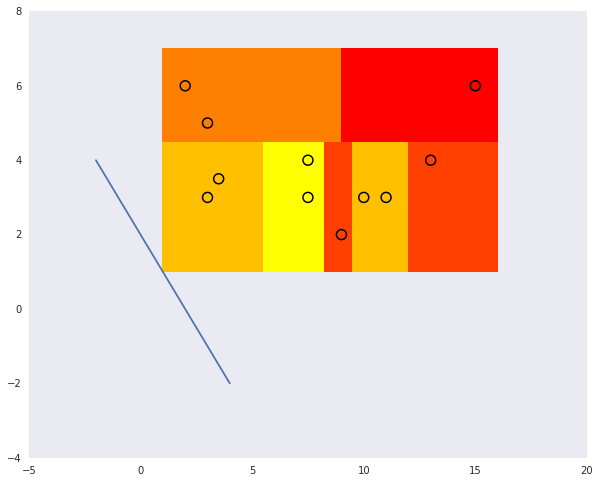

In [2]:
# Some trainings
dt = df_data_1

import numpy as np
from sklearn.tree import DecisionTreeClassifier

X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 1, 0,2,2,3,3,3,3,4,4])
Z = np.array([[9, 2], [13, 4], [15, 6],[3,5],[2,6],[10,3],[11,3],[3,3],[3.5,3.5],[7.5,4],[7.5,3]])
clf = DecisionTreeClassifier()
clf.fit(Z,y)
#print clf.apply(Z)
#clf.get_params()
#print clf.decision_path(X)
print clf.predict([[2,2]])

from sklearn.tree import export_graphviz
export_graphviz(clf, feature_names=['x1', 'x2'], 
out_file='small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(Z[:, 0], Z[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

xx, yy = get_grid(Z)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(Z[:, 0], Z[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);


In [3]:
importances = clf.feature_importances_
importances

array([ 0.75724638,  0.24275362])

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
print clf.predict([[11,11,2,2]])


[0]


In [5]:
from sklearn.tree import export_graphviz
export_graphviz(clf, feature_names=['x1', 'x2','x3','x4'], 
out_file='small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

In [6]:
# Select few columns and labels vector

rdt = dt [['Survived','Pclass','Fare','Age','Sex']]
#lbl = dt [['Survived']]
drop_labels = []

# Dropping lines with Age == NaN 
num_pass = rdt.shape[0]
i=1
while i <= num_pass :
    if np.isnan(rdt.Age[i]) :
        drop_labels.append(i)
#        print i, rdt.Age[i]
    i += 1
print "Lines dropped: ", len(drop_labels) 

rdt = rdt.drop(drop_labels)
rrdt = rdt[['Pclass','Fare','Age','Sex']]
rrdt = rrdt.replace(["female","male"],[float(0),float(1)])
slbl = rdt [['Survived']]

clf = DecisionTreeClassifier(random_state=241)
clf.fit(rrdt,slbl)



importances = clf.feature_importances_
importances



Lines dropped:  177


array([ 0.14000522,  0.30343647,  0.2560461 ,  0.30051221])

In [7]:
export_graphviz(clf, feature_names=['Pclass', 'Fare','Age','Sex'], 
out_file='tit_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'tit_tree.dot' -o 'tit_tree.png'

In [8]:
if clf.predict([[2.0,38.5,18.0,0.0]]) == 1 :
    print "Survived"
else:
    print "Not survived"

Survived
